In [17]:
from env import MazeEnv, Action

In [18]:
def string_to_int_list(s):

    try:
        return [int(item.strip()) for item in s.strip().split(' ')]
    except ValueError as e:
        # Raise an error if any part of the string cannot be converted to an integer
        raise ValueError(f"Input string is improperly formatted or contains non-integer values: {s}") from e

In [19]:
m = MazeEnv(10, 2, 3)
m.rooms

defaultdict(<class 'dict'>, {(0, 0): {<Action.STAY: 4>: (0, 0), <Action.UP: 0>: (0, -1), <Action.SABOTAGE: 7>: (0, 0), None: (0, 0), <Action.RIGHT: 3>: (1, 0), <Action.DOWN: 1>: (0, 1), <Action.LEFT: 2>: (-1, 0)}, (0, -1): {<Action.DOWN: 1>: (0, 0), <Action.UP: 0>: (0, -2), <Action.FIX: 6>: (0, -1), None: (0, -1)}, (0, -2): {<Action.DOWN: 1>: (0, -1), <Action.SABOTAGE: 7>: (0, -2), None: (0, -2), <Action.RIGHT: 3>: (1, -2), <Action.KILL: 5>: (0, -2), <Action.FIX: 6>: (0, -2), <Action.LEFT: 2>: (-1, -2)}, (1, 0): {<Action.LEFT: 2>: (0, 0), <Action.UP: 0>: (1, -1), <Action.FIX: 6>: (1, 0), None: (1, 0)}, (1, -2): {<Action.LEFT: 2>: (0, -2)}, (1, -1): {<Action.DOWN: 1>: (1, 0), <Action.KILL: 5>: (1, -1), None: (1, -1), <Action.SABOTAGE: 7>: (1, -1)}, (0, 1): {<Action.UP: 0>: (0, 0), <Action.DOWN: 1>: (0, 2)}, (0, 2): {<Action.UP: 0>: (0, 1)}, (-1, 0): {<Action.RIGHT: 3>: (0, 0)}, (-1, -2): {<Action.RIGHT: 3>: (0, -2)}})


[(0, 0),
 (0, -1),
 (0, -2),
 (1, 0),
 (1, -2),
 (1, -1),
 (0, 1),
 (0, 2),
 (-1, 0),
 (-1, -2)]

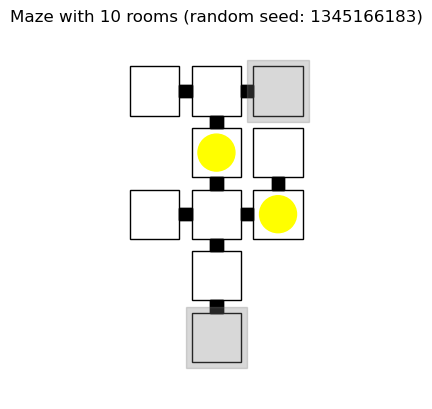

[<Action.DOWN: 1>, <Action.DOWN: 1>]
0: Action.DOWN
1: Action.DOWN
State:  ([(1, -2), (0, 2)], [(0, -1), (1, 0)], array([0., 0.]), array([1., 1.]))


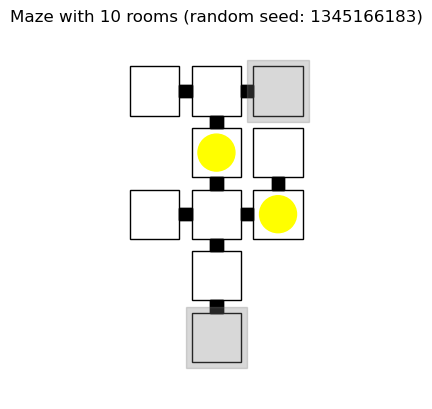

[<Action.DOWN: 1>, <Action.DOWN: 1>]
0: Action.DOWN
1: Action.DOWN
State:  ([(1, -2), (0, 2)], [(0, -1), (1, 0)], array([0., 0.]), array([1., 1.]))


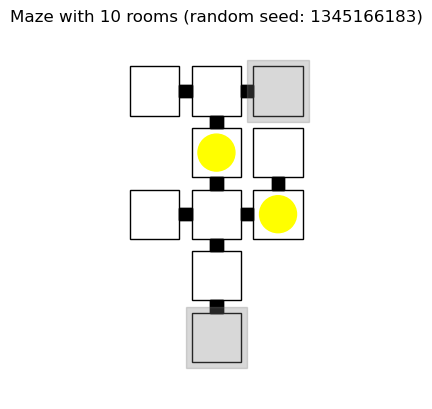

[<Action.UP: 0>, <Action.UP: 0>]
0: Action.UP
1: Action.UP
State:  ([(1, -2), (0, 1)], [(0, -1), (1, 0)], array([0., 0.]), array([1., 1.]))


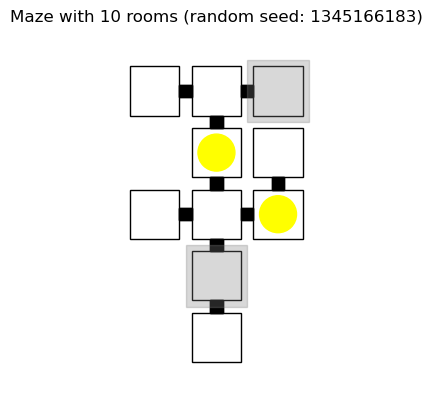

[<Action.UP: 0>, <Action.UP: 0>]
0: Action.UP
1: Action.UP
State:  ([(1, -2), (0, 0)], [(0, -1), (1, 0)], array([0., 0.]), array([1., 1.]))


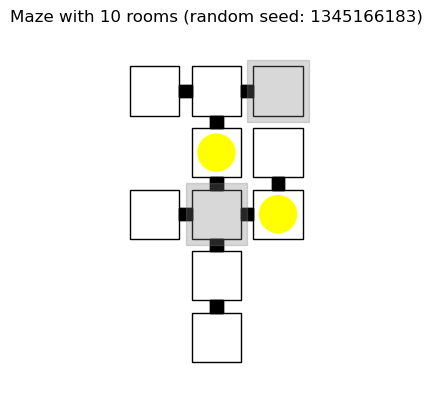

[<Action.UP: 0>, <Action.UP: 0>]
0: Action.UP
1: Action.UP
State:  ([(1, -2), (0, -1)], [(0, -1), (1, 0)], array([0., 0.]), array([1., 1.]))


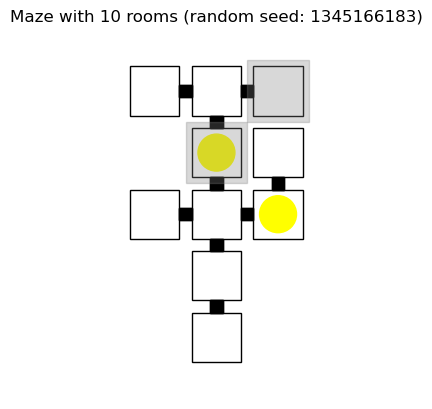

ValueError: Input string is improperly formatted or contains non-integer values: 

In [20]:
m.reset()
while True:
    m.render()
    agent_actions = [Action.STAY] * m.n_agents

    a = input(f"Actions as space separated str of int: ")

    if a == "q":
        break

    actions = string_to_int_list(a)
    actions = [Action(i) for i in actions]
    print(actions)

    state, reward, done, truncated, info = m.step(actions)
    print("State: ", state)
    
    if done:
        break